In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import time
import random
pd.set_option('display.max_columns', None)


In [24]:
data = pd.read_csv("data/embryo_data.csv")
description = pd.read_csv("data/embryo_data_description.csv")

In [25]:
data = data.loc[data.inlier==1]
data["quality"] = "red"
data.loc[(data.match_score < 2) & (data.purity_score < 2), "quality"] = "green"

Text(0, 0.5, 'purity score')

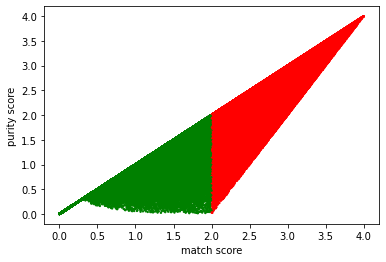

In [27]:
# plt.figure(figsize=(10,10))
cell = data.loc[data.cell_index == 100]
plt.scatter(data.match_score, data.purity_score, s = 2, color = data.quality)
plt.xlabel("match score")
plt.ylabel("purity score")

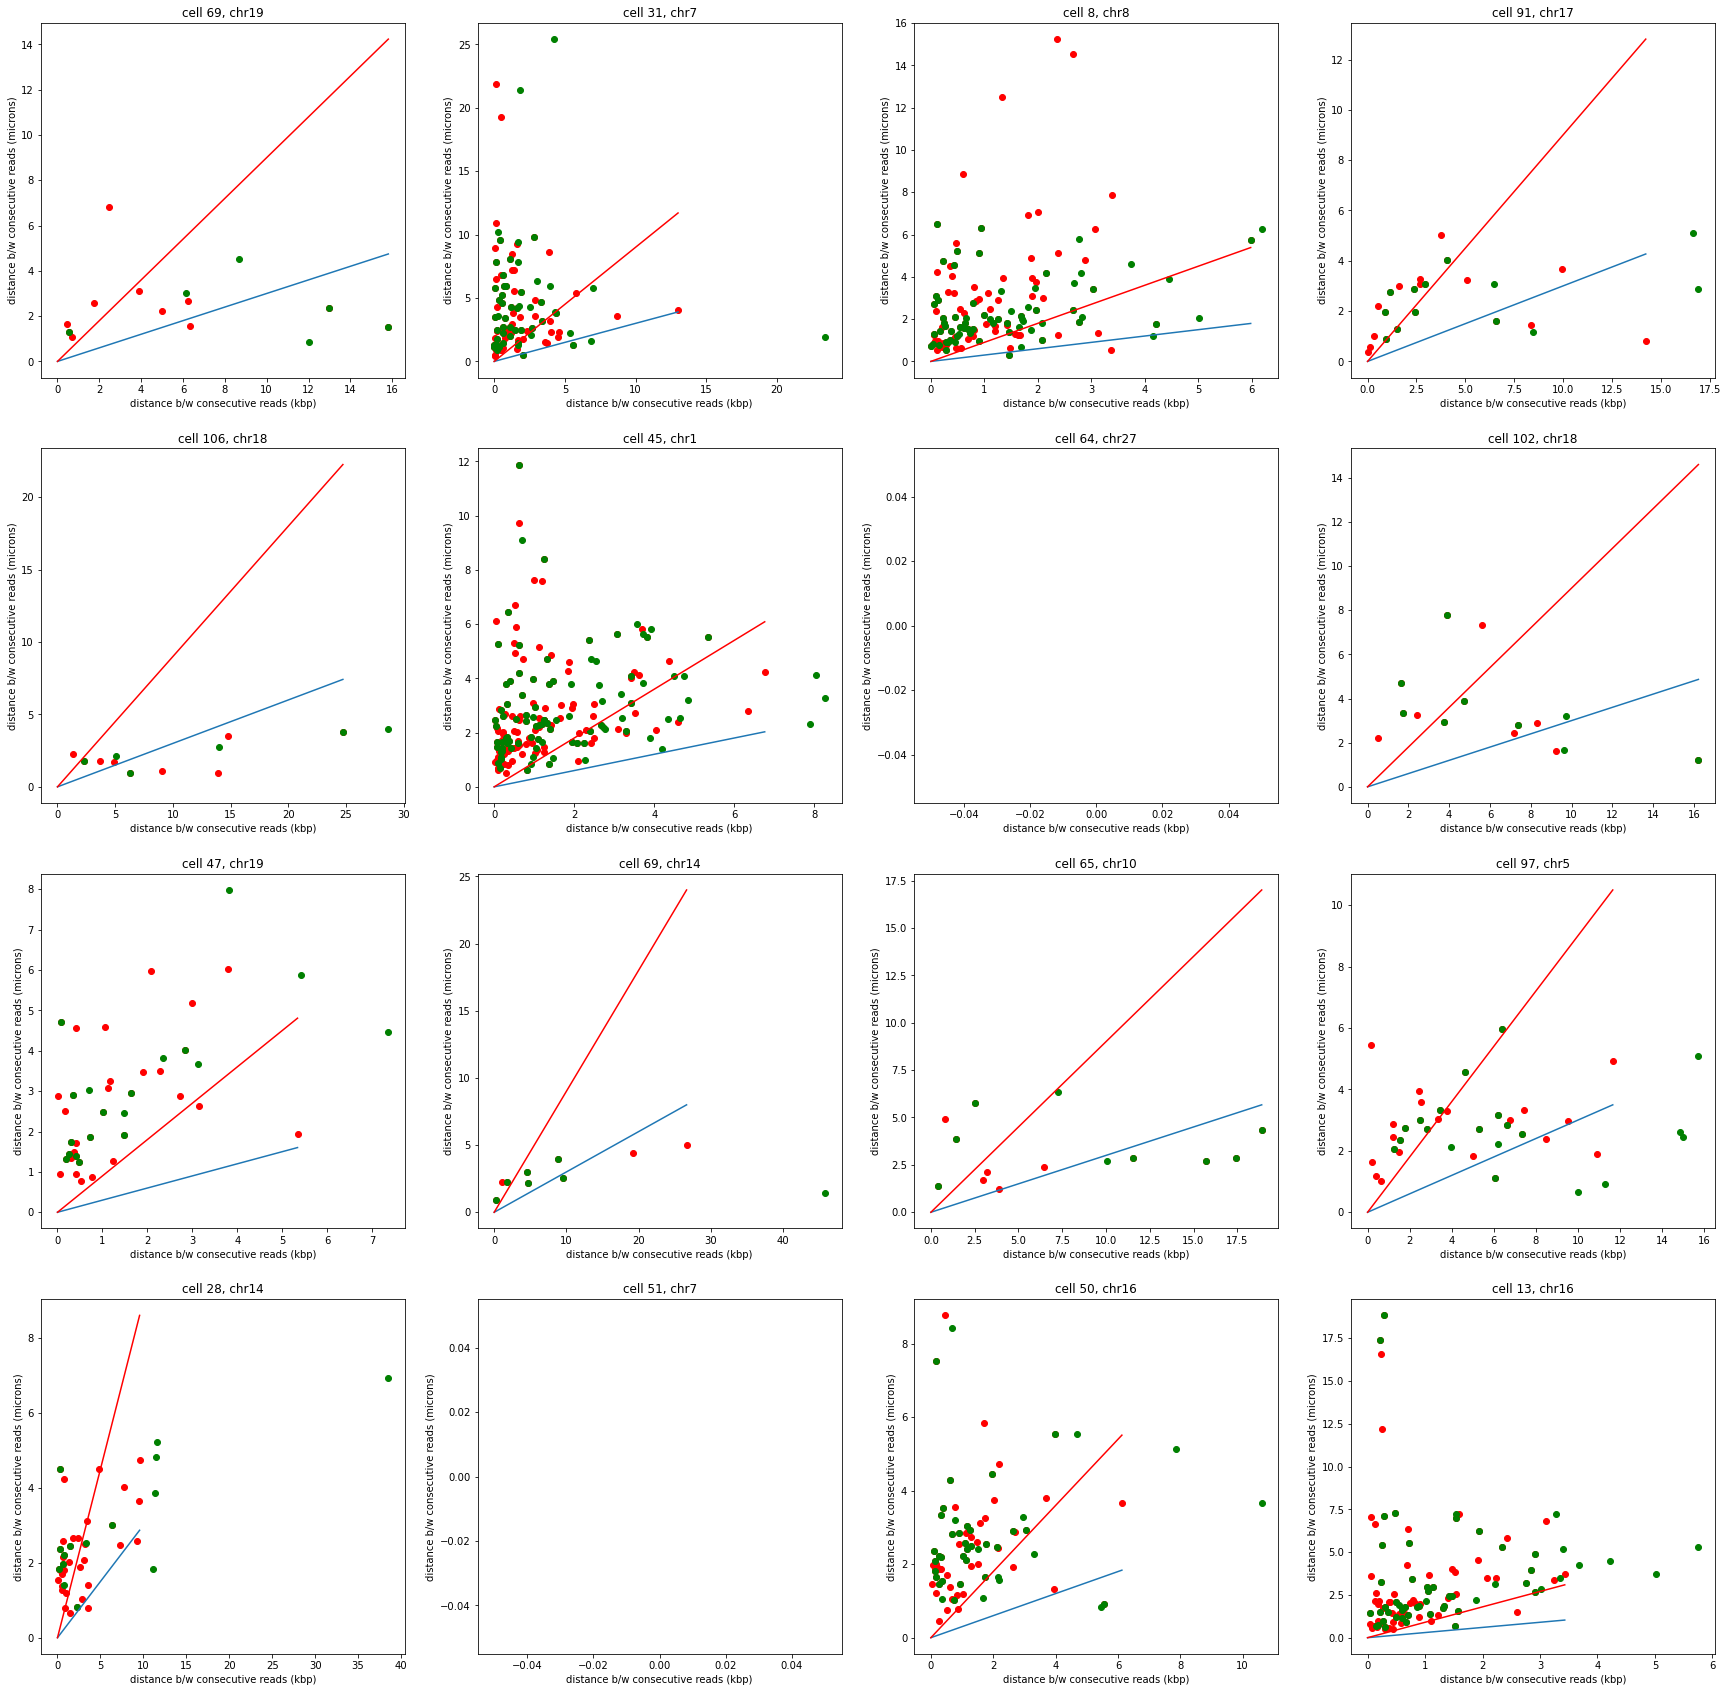

In [37]:
plt.figure(figsize = (30,30))


for i in range(16):

    cell_index = np.random.randint(1,112, 1)[0]
    chr_index = np.random.choice(data.loc[(data.cell_index==cell_index),'chr'].unique())
    cl =  1
    cell_chr_sorted = data.loc[(data.cell_index == cell_index) & (data.chr==chr_index)&((data.cluster==cl))].sort_values(by = 'rel_chr_pos')


    pos_diff = cell_chr_sorted.shift(-1).pos - cell_chr_sorted.pos - cell_chr_sorted.frag_len
    x_diff = cell_chr_sorted.shift(-1).x_um_abs - cell_chr_sorted.x_um_abs
    y_diff = cell_chr_sorted.shift(-1).y_um_abs - cell_chr_sorted.y_um_abs
    z_diff = cell_chr_sorted.shift(-1).z_um_abs - cell_chr_sorted.z_um_abs
    dist_diff = np.sqrt(x_diff**2 + y_diff**2 + z_diff**2)
    
    
    ### now the good quality ones
    cell_chr_sorted_good = cell_chr_sorted.loc[cell_chr_sorted.quality == "green"]

    pos_diff_good = cell_chr_sorted_good.shift(-1).pos - cell_chr_sorted_good.pos - cell_chr_sorted_good.frag_len
    x_diff_good = cell_chr_sorted_good.shift(-1).x_um_abs - cell_chr_sorted_good.x_um_abs
    y_diff_good = cell_chr_sorted_good.shift(-1).y_um_abs - cell_chr_sorted_good.y_um_abs
    z_diff_good = cell_chr_sorted_good.shift(-1).z_um_abs - cell_chr_sorted_good.z_um_abs
    dist_diff_good = np.sqrt(x_diff_good**2 + y_diff_good**2 + z_diff_good**2)
    
    plt.subplot(4,4,i+1)
    line = 0.3 * np.linspace(0,np.max(pos_diff/1e6),100)
    plt.scatter(pos_diff/1e6, dist_diff, color = 'red')
    plt.scatter(pos_diff_good/1e6, dist_diff_good, color = 'green')
    plt.plot(np.linspace(0,np.max(pos_diff/1e6),100), line)
    plt.plot(np.linspace(0,np.max(pos_diff/1e6),100), 3*line, color = 'red')
    
    plt.title("cell {}, chr{}".format(cell_index, chr_index))
    plt.xlabel("distance b/w consecutive reads (kbp)")
    plt.ylabel("distance b/w consecutive reads (microns)")
plt.savefig("distance_bw_consecutive_reads_2")


In [33]:
cell_index = 100
chr_index = 19
cl =  1
cell_chr_sorted = data.loc[(data.cell_index == cell_index) & (data.chr==chr_index)&((data.cluster==cl))].sort_values(by = 'rel_chr_pos')

pos_diff = cell_chr_sorted.shift(-1).pos - cell_chr_sorted.pos - cell_chr_sorted.frag_len
x_diff = cell_chr_sorted.shift(-1).x_um_abs - cell_chr_sorted.x_um_abs
y_diff = cell_chr_sorted.shift(-1).y_um_abs - cell_chr_sorted.y_um_abs
z_diff = cell_chr_sorted.shift(-1).z_um_abs - cell_chr_sorted.z_um_abs
dist_diff = np.sqrt(x_diff**2 + y_diff**2 + z_diff**2)

##### high quality reads
cell_chr_sorted_good = cell_chr_sorted.loc[cell_chr_sorted.quality == "green"]

pos_diff_good = cell_chr_sorted_good.shift(-1).pos - cell_chr_sorted_good.pos - cell_chr_sorted_good.frag_len
x_diff_good = cell_chr_sorted_good.shift(-1).x_um_abs - cell_chr_sorted_good.x_um_abs
y_diff_good = cell_chr_sorted_good.shift(-1).y_um_abs - cell_chr_sorted_good.y_um_abs
z_diff_good = cell_chr_sorted_good.shift(-1).z_um_abs - cell_chr_sorted_good.z_um_abs
dist_diff_good = np.sqrt(x_diff_good**2 + y_diff_good**2 + z_diff_good**2)

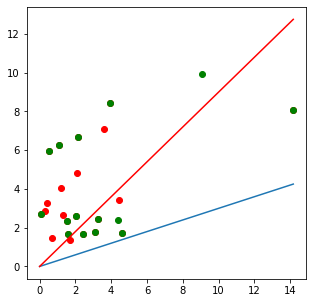

In [36]:
line = 0.3 * np.linspace(0,np.max(pos_diff/1e6),100)
plt.figure(figsize = (5,5))
plt.scatter(pos_diff/1e6, dist_diff, color = 'red')
plt.scatter(pos_diff_good/1e6, dist_diff_good, color = 'green')
plt.plot(np.linspace(0,np.max(pos_diff/1e6),100), line)
plt.plot(np.linspace(0,np.max(pos_diff/1e6),100), 3*line, color = 'red')

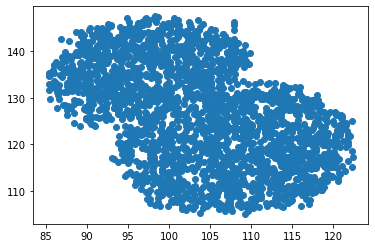

In [32]:
plt.scatter(data.loc[data.cell_index==4].x_um_abs, data.loc[data.cell_index==4].y_um_abs)

In [27]:
sort = cell_chr_sorted.iloc[np.where(dist_diff>10)]

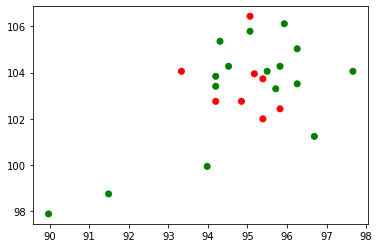

In [31]:
plt.figure()
plt.scatter(cell_chr_sorted.x_um_abs, cell_chr_sorted.y_um_abs, color = cell_chr_sorted.quality)
# plt.scatter(sort.x_um_abs, sort.y_um_abs, alpha = 0.4)
# for _,read in cell_chr_sorted.iterrows():
#     plt.text(read.x_um_abs, read.y_um_abs, str(round(read.rel_chr_pos,2)))

In [9]:
cell_chr_sorted

,embryo_id,cell_id,cell_index,stage,amp_ind,x_um_abs,y_um_abs,z_um_abs,chr,chr_name,pos,rel_chr_pos,umi_rol,purity_score,umi_seq,umi_cs,match_score,frag_len,umi_ind,hamming_dist,gt,hap1_reads,hap2_reads,hap_assignment,cluster,cluster_hap,cluster_hap_imputed,overlapping_clusters,inlier,dist_to_lamin,dist_to_npb,npb_ind,dist_to_cen,cen_ind,compartment_ind,lads_both,lads_mat,lads_pat,gc
237244,54,2,100,4cell,723,93.330569,104.055730,23.0,19,chr19,3691065,0.060084,1.423412e+18,2.065914,ACCCTTACAGATCGGAATCCT,1.423412e+18,2.065914,293.0,8195141,0,NaN,0,0,-1,1,-1,-1,0,1,1.473515,0.589732,1,2.720992,9,0,0,0,0,0.461444
237726,54,2,100,4cell,2957,95.822273,104.272400,19.8,19,chr19,4858428,0.079087,2.131212e+18,0.827981,TTAGGTTTGTTATAAACACCT,2.131212e+18,1.106511,281.0,8200037,1,NaN,0,0,-1,1,-1,-1,0,1,0.108335,4.193348,1,1.368323,9,0,0,0,0,0.476023
237715,54,2,100,4cell,2905,94.522253,104.272400,22.2,19,chr19,4915814,0.080021,2.333243e+18,0.564150,CAATCTGGGATGGAGGGTGGT,2.333243e+18,0.564150,306.0,8200238,0,NaN,0,0,-1,1,-1,-1,0,1,0.599600,1.561281,1,1.384735,9,0,0,0,0,0.476023
238885,54,2,100,4cell,8620,95.930608,106.114094,21.8,19,chr19,6470402,0.105327,4.434224e+18,1.320566,TAGAAGGGATTCTGTTCTGGT,4.434224e+18,1.320566,107.0,8206948,0,NaN,0,0,-1,1,-1,-1,0,1,0.658976,2.163496,1,2.105227,9,0,0,0,0,0.443923
237520,54,2,100,4cell,2296,96.255613,105.030745,20.6,19,chr19,8893136,0.144765,2.241332e+18,0.971850,TATCCTGACTTTGGCATGGCA,2.241332e+18,0.971850,353.0,8215740,0,NaN,0,0,-1,1,-1,-1,0,1,0.216670,3.462475,1,1.386295,9,0,0,0,0,0.431608
237207,54,2,100,4cell,589,97.663967,104.055730,20.6,19,chr19,13482720,0.219475,1.342332e+18,0.682723,TTGGTGAGTTAAAAAACGGGG,1.342332e+18,0.682723,70.0,8229977,0,NaN,0,0,-1,1,-1,-1,0,1,0.000000,4.159626,1,1.540236,8,0,0,0,0,0.378931
238277,54,2,100,4cell,5374,95.822273,102.430706,23.0,19,chr19,17943707,0.292093,3.141322e+18,2.071809,TTATACCTGAGTACAATTTAT,3.141322e+18,2.532707,NaN,8246456,1,NaN,0,0,-1,1,-1,-1,0,1,0.000000,2.381210,1,0.223714,20,0,0,0,0,0.417993
238095,54,2,100,4cell,4702,94.197249,102.755710,24.2,19,chr19,18549334,0.301951,3.322113e+18,2.201410,TGTTACTGGCCAATCTGGCCT,3.322113e+18,2.447102,85.0,8248290,1,NaN,0,0,-1,1,-1,-1,0,1,0.000000,0.673358,1,2.222615,20,0,0,0,0,0.407413
238692,54,2,100,4cell,7763,94.847258,102.755710,21.0,19,chr19,18939283,0.308299,4.421211e+18,1.120587,GCGATGGTAGAACGCTGACGG,4.221211e+18,2.263969,372.0,8249830,3,NaN,0,0,-1,1,-1,-1,0,1,0.000000,3.233355,1,1.039637,12,0,0,0,0,0.407413
237209,54,2,100,4cell,607,89.972185,97.880637,19.4,19,chr19,22526110,0.366686,1.232231e+18,0.930655,TGTTATAATCACAAGCTACCT,1.232231e+18,0.930655,285.0,8261744,0,NaN,0,0,-1,1,-1,-1,0,1,1.816025,7.881220,1,3.363913,14,0,0,0,0,0.405515


In [14]:
dist_diff

124448    2.157728
123376    1.610515
123579    2.551124
123560    1.381569
124147    1.275846
124348    5.338313
123367    2.110533
123772    3.518293
123450    2.501107
123723    1.468060
124416    3.670133
123564    0.807302
124257    3.624163
123975    6.941837
123856    4.099946
123717    2.890287
123583    4.023781
123526    4.000619
124143    1.196599
123932    3.559477
124269         NaN
dtype: float64